In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import numpy as np

# Data Prep


In [55]:
# Read in Data
data = pd.read_csv("./Econ424_F2023_PC4_training_data_small.csv")
print(data.head())

     price back_legroom  bed bed_height bed_length        body_type cabin  \
0  36990.0      40.3 in  NaN         --    67.4 in     Pickup Truck   NaN   
1   5524.0      39.6 in  NaN        NaN        NaN          Minivan   NaN   
2  39205.0      35.2 in  NaN         --    79.4 in     Pickup Truck   NaN   
3  32578.0          NaN  NaN        NaN        NaN     Pickup Truck   NaN   
4  17999.0      36.8 in  NaN        NaN        NaN  SUV / Crossover   NaN   

           city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0       Memphis               15.0                   NaN  ...             A   
1         Plano               17.0                   NaN  ...             A   
2        Monroe               15.0                   NaN  ...             A   
3          Rome                NaN                   NaN  ...             A   
4  Fayetteville               18.0                   NaN  ...             A   

  transmission_display  trimid              trim_name vehicle_

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/3697113779.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Econ424_F2023_PC4_training_data_small.csv")


In [56]:
# Find in missing values
missing = data.isna().sum()
for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])
data.shape
data.info()

price: 0
back_legroom: 10458
bed: 198723
bed_height: 171127
bed_length: 171127
body_type: 922
cabin: 195757
city: 0
city_fuel_economy: 32765
combine_fuel_economy: 200000
daysonmarket: 0
dealer_zip: 0
engine_cylinders: 6591
engine_displacement: 11357
engine_type: 6591
exterior_color: 0
fleet: 94967
frame_damaged: 94967
franchise_dealer: 0
franchise_make: 38202
front_legroom: 10458
fuel_tank_volume: 10458
fuel_type: 5383
has_accidents: 94967
height: 10458
highway_fuel_economy: 32765
horsepower: 11357
interior_color: 17
iscab: 94967
is_certified: 200000
is_cpo: 187840
is_new: 0
is_oemcpo: 191019
latitude: 0
length: 10458
listed_date: 0
listing_color: 0
longitude: 0
major_options: 13301
make_name: 0
maximum_seating: 10458
mileage: 9534
model_name: 0
owner_count: 100893
power: 32019
salvage: 94967
savings_amount: 0
seller_rating: 2651
sp_id: 4
sp_name: 0
theft_title: 94967
torque: 34330
transmission: 4212
transmission_display: 4212
trimid: 7591
trim_name: 7623
vehicle_damage_category: 20000

In [32]:
# Large Data
dataL = pd.read_csv("./Econ424_F2023_PC4_training_data_large.csv")
print(dataL.head())

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_27433/2556067753.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataL = pd.read_csv("./Econ424_F2023_PC4_training_data_large.csv")


     price back_legroom  bed bed_height bed_length        body_type cabin  \
0  36990.0      40.3 in  NaN         --    67.4 in     Pickup Truck   NaN   
1   5524.0      39.6 in  NaN        NaN        NaN          Minivan   NaN   
2  39205.0      35.2 in  NaN         --    79.4 in     Pickup Truck   NaN   
3  32578.0          NaN  NaN        NaN        NaN     Pickup Truck   NaN   
4  17999.0      36.8 in  NaN        NaN        NaN  SUV / Crossover   NaN   

           city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0       Memphis               15.0                   NaN  ...             A   
1         Plano               17.0                   NaN  ...             A   
2        Monroe               15.0                   NaN  ...             A   
3          Rome                NaN                   NaN  ...             A   
4  Fayetteville               18.0                   NaN  ...             A   

  transmission_display  trimid              trim_name vehicle_

In [33]:
missingL = dataL.isna().sum()
for x in range(len(missingL)):
    print(str(dataL.columns[x]) + ": " + str(missingL[x]))

price: 0
back_legroom: 53190
bed: 993460
bed_height: 856444
bed_length: 856444
body_type: 4648
cabin: 978713
city: 0
city_fuel_economy: 163747
combine_fuel_economy: 1000000
daysonmarket: 0
dealer_zip: 0
engine_cylinders: 33456
engine_displacement: 57655
engine_type: 33456
exterior_color: 6
fleet: 475176
frame_damaged: 475176
franchise_dealer: 0
franchise_make: 190662
front_legroom: 53190
fuel_tank_volume: 53190
fuel_type: 27409
has_accidents: 475176
height: 53190
highway_fuel_economy: 163747
horsepower: 57655
interior_color: 54
iscab: 475176
is_certified: 1000000
is_cpo: 938856
is_new: 0
is_oemcpo: 954751
latitude: 0
length: 53190
listed_date: 0
listing_color: 0
longitude: 0
major_options: 66555
make_name: 0
maximum_seating: 53190
mileage: 48233
model_name: 0
owner_count: 505129
power: 160407
salvage: 475176
savings_amount: 0
seller_rating: 13698
sp_id: 25
sp_name: 0
theft_title: 475176
torque: 172515
transmission: 21266
transmission_display: 21266
trimid: 38852
trim_name: 39006
vehicl

# Missing is_certified, vehicicle_damage_category, combine_fuel_economy for all of them





In [57]:
# useless categories
# fleet, is_cpo, is oemcpo major options, bed, bed height, bed length, cabin, iscab, transmission display, engine cylinders
data.drop(['is_certified','vehicle_damage_category', 'combine_fuel_economy','wheel_system_display','fleet','is_cpo', 'is_oemcpo','bed','bed_height','bed_length','cabin','iscab','transmission_display','engine_cylinders'], errors='ignore',
  axis='columns', inplace=True)
data.shape

(200000, 48)

In [58]:
data.columns

Index(['price', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'frame_damaged', 'franchise_dealer', 'franchise_make',
       'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'longitude', 'major_options', 'make_name', 'maximum_seating', 'mileage',
       'model_name', 'owner_count', 'power', 'salvage', 'savings_amount',
       'seller_rating', 'sp_id', 'sp_name', 'theft_title', 'torque',
       'transmission', 'trimid', 'trim_name', 'wheel_system', 'wheelbase',
       'width', 'year'],
      dtype='object')

In [59]:
for col in data:
    print(col)
    print(data[col].unique())

price
[36990.  5524. 39205. ... 14025. 88740. 67930.]
back_legroom
['40.3 in' '39.6 in' '35.2 in' nan '36.8 in' '39.7 in' '37.4 in' '36.5 in'
 '38.3 in' '28.2 in' '39 in' '36.7 in' '31.2 in' '37 in' '34.8 in'
 '35.7 in' '35.1 in' '39.3 in' '40.4 in' '38.5 in' '35.3 in' '33.2 in'
 '39.1 in' '37.9 in' '41.5 in' '--' '37.1 in' '40.1 in' '39.5 in'
 '40.9 in' '36.1 in' '43.4 in' '42.3 in' '34.3 in' '35.8 in' '38.8 in'
 '34.2 in' '45.2 in' '37.6 in' '38.9 in' '38.1 in' '43.5 in' '35 in'
 '39.9 in' '38.4 in' '40.7 in' '38.6 in' '36.3 in' '43.6 in' '34.6 in'
 '38 in' '44.3 in' '33.1 in' '37.2 in' '41 in' '40.5 in' '35.6 in'
 '39.4 in' '33.6 in' '38.2 in' '41.7 in' '34.4 in' '38.7 in' '37.3 in'
 '41.4 in' '40.2 in' '36.2 in' '40.6 in' '32.4 in' '42.4 in' '37.7 in'
 '30.1 in' '32.5 in' '42 in' '34.1 in' '31 in' '36 in' '32.2 in' '33.5 in'
 '34.7 in' '33.4 in' '37.8 in' '31.7 in' '33 in' '29.9 in' '39.8 in'
 '32.6 in' '37.5 in' '33.7 in' '29 in' '34 in' '43.1 in' '32.9 in'
 '35.4 in' '27.3 in' '3

In [60]:
# Define a regular expression pattern to extract float values
# pattern = r'(\d+\.\d+) in'
pattern = r' in'
patternGal = r'(\d+\.\d+) gal'
weirdCols = ["back_legroom", "front_legroom", "height", "length", "wheelbase", "width", "maximum_seating", "fuel_tank_volume"]
# Iterate through the columns and extract float components for matching columns
for column in weirdCols:
    if len(data[column].unique()) >= 4 and data[column].dtype == object:
        print(column)
        for i in range(len(data[column])):
                if pd.isna(data[column][i]):
                    continue
                elif isinstance(data[column][i], str):
                    # print("found string")
                   
                    if len(data[column][i]) <= 2:
                        continue
                    end = data[column][i][-3:]
                    if end == " in":
                        data[column][i] = float(data[column][i][:-3])
                        continue
                    if len(data[column][i]) <= 3:
                        continue
                    end = data[column][i][-4:]
                    if end == " gal":
                        data[column][i] = float(data[column][i][:-4])
                        continue
                    
                    if len(data[column][i]) <= 5:
                        continue
                    end = data[column][i][-6:]
                    if end == " seats":
                        data[column][i] = int(data[column][i][:-6])

data.head

back_legroom


/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/119999234.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = float(data[column][i][:-3])


front_legroom
height
length
wheelbase
width
maximum_seating


/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/119999234.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = int(data[column][i][:-6])


fuel_tank_volume


/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/119999234.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = float(data[column][i][:-4])


<bound method NDFrame.head of           price back_legroom        body_type            city  \
0       36990.0         40.3     Pickup Truck         Memphis   
1        5524.0         39.6          Minivan           Plano   
2       39205.0         35.2     Pickup Truck          Monroe   
3       32578.0          NaN     Pickup Truck            Rome   
4       17999.0         36.8  SUV / Crossover    Fayetteville   
...         ...          ...              ...             ...   
199995  39000.0         34.6     Pickup Truck  Spokane Valley   
199996  22653.0         35.0  SUV / Crossover    Indianapolis   
199997  12849.0         36.8  SUV / Crossover     Saint Louis   
199998  25218.0         40.4  SUV / Crossover   Pompano Beach   
199999  12995.0         38.6            Sedan            Mesa   

        city_fuel_economy  daysonmarket dealer_zip  engine_displacement  \
0                    15.0             8      38103               5700.0   
1                    17.0           181

In [61]:
for col in data.columns:
    print(col + ": " + str(data[col].unique()))

price: [36990.  5524. 39205. ... 14025. 88740. 67930.]
back_legroom: [40.3 39.6 35.2 nan 36.8 39.7 37.4 36.5 38.3 28.2 39.0 36.7 31.2 37.0 34.8
 35.7 35.1 39.3 40.4 38.5 35.3 33.2 39.1 37.9 41.5 '--' 37.1 40.1 39.5
 40.9 36.1 43.4 42.3 34.3 35.8 38.8 34.2 45.2 37.6 38.9 38.1 43.5 35.0
 39.9 38.4 40.7 38.6 36.3 43.6 34.6 38.0 44.3 33.1 37.2 41.0 40.5 35.6
 39.4 33.6 38.2 41.7 34.4 38.7 37.3 41.4 40.2 36.2 40.6 32.4 42.4 37.7
 30.1 32.5 42.0 34.1 31.0 36.0 32.2 33.5 34.7 33.4 37.8 31.7 33.0 29.9
 39.8 32.6 37.5 33.7 29.0 34.0 43.1 32.9 35.4 27.3 31.9 30.9 34.5 30.3
 40.0 32.7 36.6 29.2 0.0 35.9 33.3 35.5 36.9 36.4 41.9 27.1 33.8 31.6 32.0
 43.2 33.9 39.2 28.6 42.1 41.3 32.3 23.7 31.3 47.5 23.1 30.6 41.1 29.5
 41.8 30.4 42.6 25.4 30.8 42.9 41.2 3.5 24.8 34.9 32.1 29.8 30.5 44.2 31.1
 43.0 28.9 44.5 32.8 44.4 44.1 28.1 31.4 24.6 27.7 47.4 31.8 24.0 28.3
 43.3 40.8 30.7 30.2 41.6 28.7 45.3 26.4 29.3 31.5 27.2 42.2 46.8 26.8
 43.7 27.6 29.6 30.0 28.5 20.2 27.5 25.2 13.0 28.8 23.8 27.4 23.0 4

In [62]:
# Replace all with mean and mode
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']

for col in data.columns:
    if col in categorical_columns or col in bool_columns:
        # calculate mode
        average = "-1"
        # Replace "--" with NaN
        data[col] = data[col].replace(np.nan, "--")
        data[col] = data[col].replace("--", pd.NA)
        # Calculate the mode of the valid string values
        mode_value = data[col].mode(dropna=True).iloc[0]

        # Replace NaN with the mode
        data[col].fillna(mode_value,inplace=True)
        
    elif col != "listed_date":
        # calculate mean
        # Convert non-numeric values ("--") to NaN
        data[col] = pd.to_numeric(data[col], errors="coerce")

        # Calculate the mean of the valid numeric values
        mean_value = data[col].dropna().mean()

        # Replace NaN and "--" with the mean
        data[col].fillna(mean_value, inplace=True)
    
        
# Mean: back_legroom, city_fuel_economy, engine_displacement, front_legroom, fuel_tank_volume, height,
# highway_fuel_economy,  mileage, wheelbase, width

# Mode: maximum seating, owner count, seller rating, trimid

In [63]:
for col in data.columns:
    print(col + ": " + str(data[col].unique()))

price: [36990.  5524. 39205. ... 14025. 88740. 67930.]
back_legroom: [40.3        39.6        35.2        37.97321068 36.8        39.7
 37.4        36.5        38.3        28.2        39.         36.7
 31.2        37.         34.8        35.7        35.1        39.3
 40.4        38.5        35.3        33.2        39.1        37.9
 41.5        37.1        40.1        39.5        40.9        36.1
 43.4        42.3        34.3        35.8        38.8        34.2
 45.2        37.6        38.9        38.1        43.5        35.
 39.9        38.4        40.7        38.6        36.3        43.6
 34.6        38.         44.3        33.1        37.2        41.
 40.5        35.6        39.4        33.6        38.2        41.7
 34.4        38.7        37.3        41.4        40.2        36.2
 40.6        32.4        42.4        37.7        30.1        32.5
 42.         34.1        31.         36.         32.2        33.5
 34.7        33.4        37.8        31.7        33.         29.9
 39.8    

In [64]:
missing = data.isna().sum()
for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])
data.shape
data.info()
print(data['listed_date'])
print(data['year'])

price: 0
back_legroom: 0
body_type: 0
city: 0
city_fuel_economy: 0
daysonmarket: 0
dealer_zip: 0
engine_displacement: 0
engine_type: 0
exterior_color: 0
frame_damaged: 0
franchise_dealer: 0
franchise_make: 0
front_legroom: 0
fuel_tank_volume: 0
fuel_type: 0
has_accidents: 0
height: 0
highway_fuel_economy: 0
horsepower: 0
interior_color: 0
is_new: 0
latitude: 0
length: 0
listed_date: 0
listing_color: 0
longitude: 0
major_options: 0
make_name: 0
maximum_seating: 0
mileage: 0
model_name: 0
owner_count: 0
power: 0
salvage: 0
savings_amount: 0
seller_rating: 0
sp_id: 0
sp_name: 0
theft_title: 0
torque: 0
transmission: 0
trimid: 0
trim_name: 0
wheel_system: 0
wheelbase: 0
width: 0
year: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 200000 non-null  float64
 1   back_legroom          200000 non-nul

In [65]:
# Updated csv file
csv_file = "./updatedSmall.csv"


# Use numpy.savetxt to save the array as a CSV file
data.to_csv(csv_file,index=False, encoding="utf-8")

## Apply Label Encoder and Standard Scaler

In [76]:
data = pd.read_csv("./updatedSmallFinal.csv")

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/1062083393.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./updatedSmallFinal.csv")


In [77]:
# setup categorical variables
# label encoder to encode the different categorical features
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']


label_encoder = LabelEncoder()
for category in categorical_columns:
    print("Doing it for category: " + category)

    data[category] = data[category].astype(str)
    print(all)

    data[category] = label_encoder.fit_transform(data[category])
# data['target'] = np.log(data['price'])
for category in bool_columns:
    print("Doing it for category: " + category)

    data[category] = data[category].astype(str)
    print(all)

    data[category] = label_encoder.fit_transform(data[category])



Doing it for category: trimid
<built-in function all>
Doing it for category: body_type
<built-in function all>
Doing it for category: city
<built-in function all>
Doing it for category: dealer_zip
<built-in function all>
Doing it for category: engine_type
<built-in function all>
Doing it for category: exterior_color
<built-in function all>
Doing it for category: franchise_make
<built-in function all>
Doing it for category: fuel_type
<built-in function all>
Doing it for category: horsepower
<built-in function all>
Doing it for category: interior_color
<built-in function all>
Doing it for category: listing_color
<built-in function all>
Doing it for category: major_options
<built-in function all>
Doing it for category: make_name
<built-in function all>
Doing it for category: model_name
<built-in function all>
Doing it for category: power
<built-in function all>
Doing it for category: sp_name
<built-in function all>
Doing it for category: torque
<built-in function all>
Doing it for categor

In [79]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 200000 non-null  float64
 1   back_legroom          200000 non-null  float64
 2   body_type             200000 non-null  int64  
 3   city                  200000 non-null  int64  
 4   city_fuel_economy     200000 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  int64  
 7   engine_displacement   200000 non-null  float64
 8   engine_type           200000 non-null  int64  
 9   exterior_color        200000 non-null  int64  
 10  frame_damaged         200000 non-null  int64  
 11  franchise_dealer      200000 non-null  int64  
 12  franchise_make        200000 non-null  int64  
 13  front_legroom         200000 non-null  float64
 14  fuel_tank_volume      200000 non-null  float64
 15  

In [69]:
missing = data.isna().sum()

for x in range(len(missing)):
    print(str(data.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])

price: 0
back_legroom: 0
body_type: 0
city: 0
city_fuel_economy: 0
daysonmarket: 0
dealer_zip: 0
engine_displacement: 0
engine_type: 0
exterior_color: 0
frame_damaged: 0
franchise_dealer: 0
franchise_make: 0
front_legroom: 0
fuel_tank_volume: 0
fuel_type: 0
has_accidents: 0
height: 0
highway_fuel_economy: 0
horsepower: 0
interior_color: 0
is_new: 0
latitude: 0
length: 0
listed_date: 0
listing_color: 0
longitude: 0
major_options: 0
make_name: 0
maximum_seating: 0
mileage: 0
model_name: 0
owner_count: 0
power: 0
salvage: 0
savings_amount: 0
seller_rating: 0
sp_id: 0
sp_name: 0
theft_title: 0
torque: 0
transmission: 0
trimid: 0
trim_name: 0
wheel_system: 0
wheelbase: 0
width: 0
year: 0


In [80]:
data['target'] = np.log(data['price'])


In [81]:
print(data['target'])

0         10.518403
1          8.616858
2         10.576560
3         10.391392
4          9.798071
            ...    
199995    10.571317
199996    10.028048
199997     9.461021
199998    10.135313
199999     9.472320
Name: target, Length: 200000, dtype: float64


# Create Different Models


In [101]:
# Imports
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset 
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table 
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR,  plot_tree, export_text)
from sklearn.metrics import (accuracy_score , log_loss) 
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)

from matplotlib.pyplot import subplots 
import statsmodels.api as sm


from sklearn.model_selection import train_test_split 
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


from sklearn.preprocessing import LabelEncoder

In [87]:
# Set up Data
Y = data['target']
X = data.drop(columns=['price','target','listed_date'])

In [89]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


## Bagging

In [90]:
bag = RF(max_features=X_train.shape[1],random_state=0)
bag.fit(X_train,y_train)

RandomForestRegressor(max_features=46, random_state=0)

0.015711617213334063

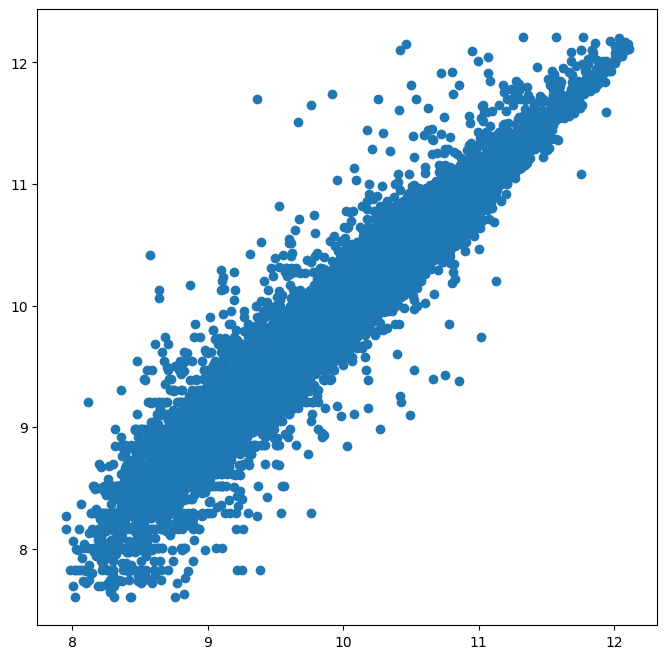

In [91]:
ax = subplots(figsize=(8,8))[1] 
y_hat_bag = bag.predict(X_test) 
ax.scatter(y_hat_bag, y_test) 
np.mean((y_test - y_hat_bag)**2)

In [111]:
feature_imp = pd.DataFrame( {'importance':bag.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
year,0.424558
horsepower,0.224874
trimid,0.068906
power,0.047589
mileage,0.045042
torque,0.014544
length,0.013539
width,0.012433
model_name,0.011044
wheel_system,0.010482


In [114]:
data_bag = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(X_train, y_train) 
y_hat_bag = data_bag.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

0.015556287973209721

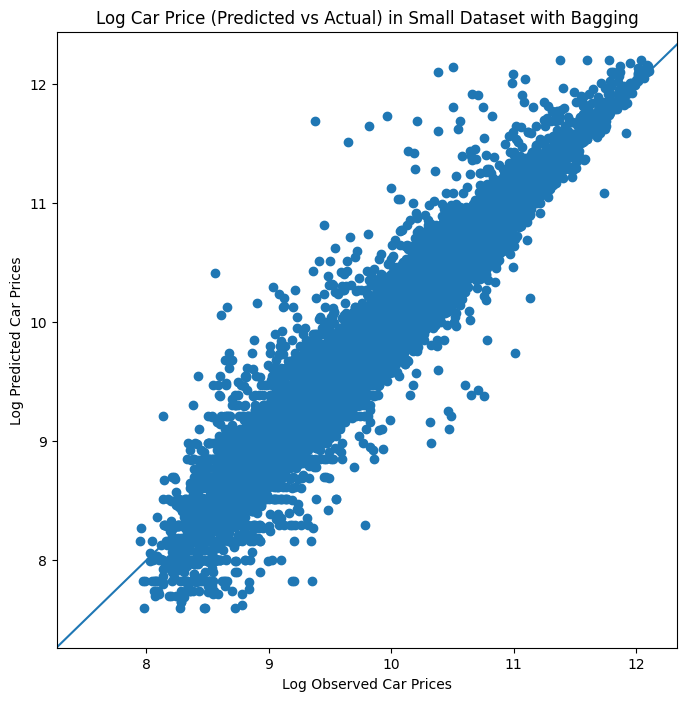

In [139]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(y_hat_bag, y_test) 
ax.title.set_text('Log Car Price (Predicted vs Actual) in Small Dataset with Bagging')
ax.set_xlabel("Log Observed Car Prices")
ax.set_ylabel("Log Predicted Car Prices")
ax.axline((7.5,7.5), slope=1)

In [116]:
feature_imp = pd.DataFrame( {'importance':data_bag.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
year,0.420398
horsepower,0.224783
trimid,0.069088
mileage,0.049181
power,0.047790
torque,0.013990
length,0.013360
width,0.012958
model_name,0.011159
wheel_system,0.010514


In [117]:
r2_score(y_test, y_hat_bag)

0.9558079143797128

## Random Forests

In [93]:
rf = RF(max_features=int(np.sqrt(X_train.shape[1])),random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=6, random_state=0)

0.015939137420761213

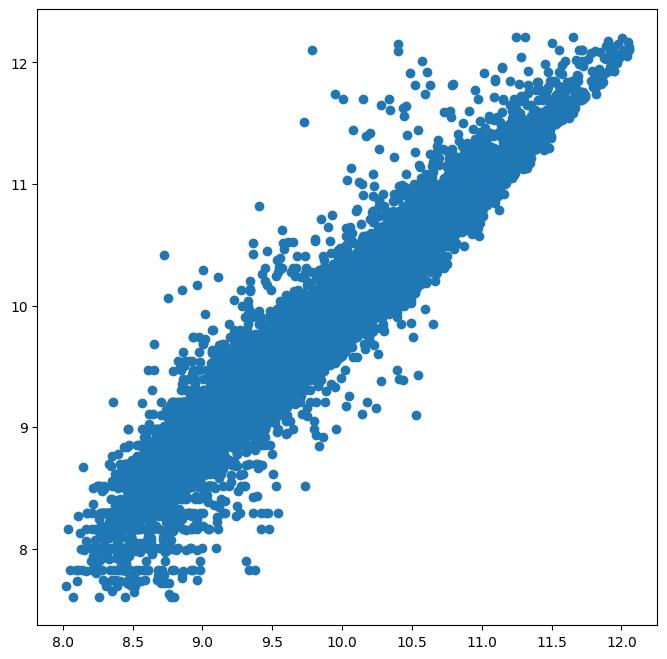

In [94]:
ax = subplots(figsize=(8,8))[1] 
y_hat_rf = rf.predict(X_test) 
ax.scatter(y_hat_rf, y_test) 
np.mean((y_test - y_hat_rf)**2)

In [105]:
r2_score(y_test, y_hat_rf)

0.9547203210158581

In [96]:
feature_imp = pd.DataFrame( {'importance':rf.feature_importances_}, index=X.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
year,0.140175
trimid,0.122218
mileage,0.109669
power,0.068380
horsepower,0.061233
torque,0.054226
is_new,0.050214
owner_count,0.036379
fuel_tank_volume,0.029916
width,0.027656


## Boosting

In [97]:
data_boost = GBR(n_estimators=5000, learning_rate=0.2, max_depth=3, random_state=0)
data_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=0)

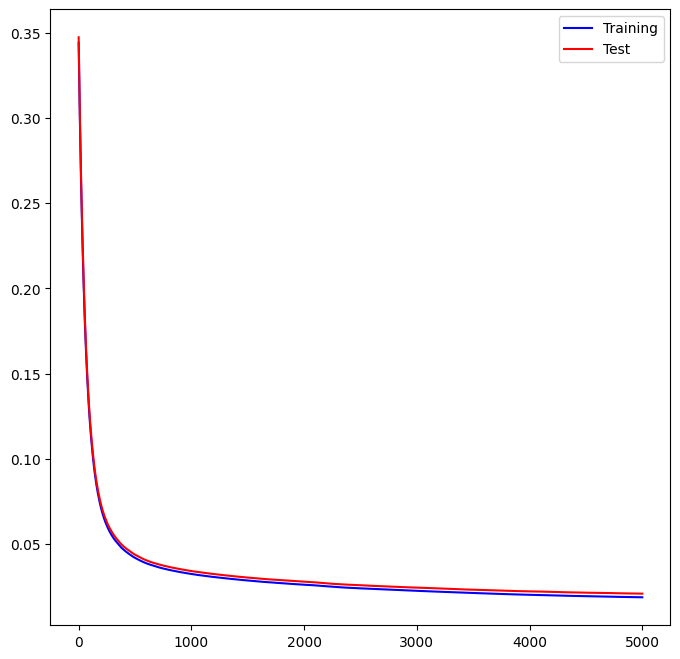

In [98]:
test_error = np.zeros_like(data_boost.train_score_)
for idx, y_ in enumerate(data_boost.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)
plot_idx = np.arange(data_boost.train_score_.shape[0]) 
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,data_boost.train_score_, 'b',label='Training')
ax.plot(plot_idx, test_error ,'r',label='Test') 
ax.legend();

0.015939137420761213

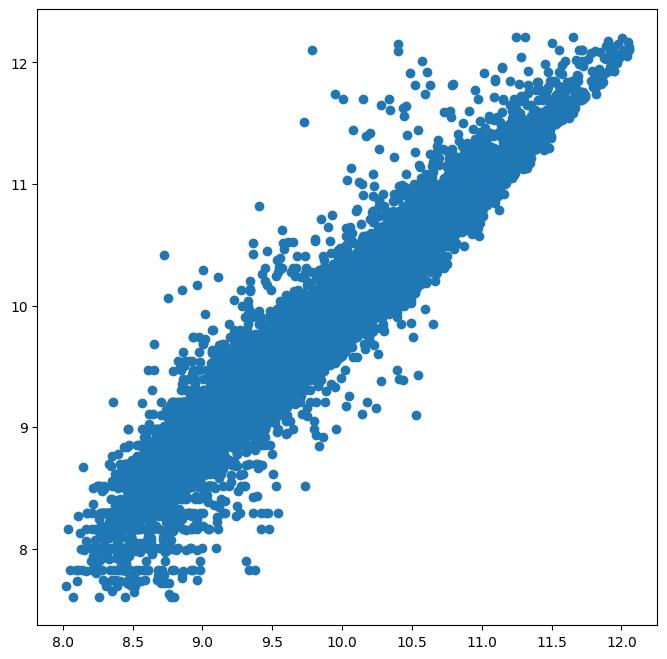

In [108]:
ax = subplots(figsize=(8,8))[1] 
y_hat_boost = rf.predict(X_test) 
ax.scatter(y_hat_boost, y_test) 
np.mean((y_test - y_hat_boost)**2)

In [99]:
y_hat_boost = data_boost.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

0.020946864294839527

In [107]:
r2_score(y_test, y_hat_boost)

0.9404944404482447

# Create log charts for each model

In [118]:
# choose best one
bestModel = data_bag

# Make Predictions

In [119]:
# Preprocess prediction data
# Read in Data
dataPred = pd.read_csv("./Econ424_F2023_PC4_test_data_without_response_var.csv")
print(dataPred.head())

dataPred.drop(['is_certified','vehicle_damage_category', 'combine_fuel_economy','wheel_system_display','fleet','is_cpo', 'is_oemcpo','bed','bed_height','bed_length','cabin','iscab','transmission_display','engine_cylinders','listed_date'], errors='ignore',
  axis='columns', inplace=True)
dataPred.shape

weirdCols = ["back_legroom", "front_legroom", "height", "length", "wheelbase", "width", "maximum_seating", "fuel_tank_volume"]
# Iterate through the columns and extract float components for matching columns
for column in weirdCols:
    if len(dataPred[column].unique()) >= 4 and dataPred[column].dtype == object:
        print(column)
        for i in range(len(dataPred[column])):
                if pd.isna(dataPred[column][i]):
                    continue
                elif isinstance(dataPred[column][i], str):
                    # print("found string")
                   
                    if len(dataPred[column][i]) <= 2:
                        continue
                    end = dataPred[column][i][-3:]
                    if end == " in":
                        dataPred[column][i] = float(dataPred[column][i][:-3])
                        continue
                    if len(dataPred[column][i]) <= 3:
                        continue
                    end = dataPred[column][i][-4:]
                    if end == " gal":
                        dataPred[column][i] = float(dataPred[column][i][:-4])
                        continue
                    
                    if len(dataPred[column][i]) <= 5:
                        continue
                    end = dataPred[column][i][-6:]
                    if end == " seats":
                        dataPred[column][i] = int(dataPred[column][i][:-6])
                        

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/948960116.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataPred = pd.read_csv("./Econ424_F2023_PC4_test_data_without_response_var.csv")
/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/948960116.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = float(dataPred[column][i][:-3])


   price back_legroom  bed bed_height bed_length        body_type cabin  \
0    NaN        38 in  NaN        NaN        NaN            Sedan   NaN   
1    NaN      35.9 in  NaN        NaN        NaN            Sedan   NaN   
2    NaN      38.1 in  NaN        NaN        NaN            Sedan   NaN   
3    NaN      40.2 in  NaN         --    76.3 in     Pickup Truck   NaN   
4    NaN      37.9 in  NaN        NaN        NaN  SUV / Crossover   NaN   

        city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0   Waukegan               25.0                   NaN  ...             A   
1    Milford               29.0                   NaN  ...             A   
2  Braintree               29.0                   NaN  ...             A   
3    Demotte                NaN                   NaN  ...             A   
4     Austin               26.0                   NaN  ...             A   

  transmission_display  trimid               trim_name  \
0            Automatic  t92286    

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/948960116.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = int(dataPred[column][i][:-6])


fuel_tank_volume


/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_40292/948960116.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPred[column][i] = float(dataPred[column][i][:-4])


In [120]:
# Replace all with mean and mode
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']

for col in dataPred.columns:
    if col in categorical_columns or col in bool_columns:
        # calculate mode
        average = "-1"
        # Replace "--" with NaN
        dataPred[col] = dataPred[col].replace(np.nan, "--")
        dataPred[col] = dataPred[col].replace("--", pd.NA)
        # Calculate the mode of the valid string values
        mode_value = dataPred[col].mode(dropna=True).iloc[0]

        # Replace NaN with the mode
        dataPred[col].fillna(mode_value,inplace=True)
        
    elif col != "listed_date":
        # calculate mean
        # Convert non-numeric values ("--") to NaN
        dataPred[col] = pd.to_numeric(dataPred[col], errors="coerce")

        # Calculate the mean of the valid numeric values
        mean_value = dataPred[col].dropna().mean()

        # Replace NaN and "--" with the mean
        dataPred[col].fillna(mean_value, inplace=True)

In [121]:
categorical_columns = ['trimid','body_type','city','dealer_zip','engine_type','exterior_color','franchise_make','fuel_type','horsepower','interior_color'
                       ,'listing_color','major_options','make_name','model_name','power','sp_name','torque','transmission','trim_name','wheel_system']
bool_columns = ['frame_damaged','franchise_dealer','has_accidents','is_new','salvage','theft_title']


label_encoder = LabelEncoder()
for category in categorical_columns:
    print("Doing it for category: " + category)
    dataPred[category] = dataPred[category].astype(str)
    print(all)

    dataPred[category] = label_encoder.fit_transform(dataPred[category])
for category in bool_columns:
    print("Doing it for category: " + category)
    dataPred[category] = dataPred[category].astype(str)
    print(all)

    dataPred[category] = label_encoder.fit_transform(dataPred[category])

missing = dataPred.isna().sum()

for x in range(len(missing)):
    print(str(dataPred.columns[x]) + ": " + str(missing[x]))
    # print(missing[x])

Doing it for category: trimid
<built-in function all>
Doing it for category: body_type
<built-in function all>
Doing it for category: city
<built-in function all>
Doing it for category: dealer_zip
<built-in function all>
Doing it for category: engine_type
<built-in function all>
Doing it for category: exterior_color
<built-in function all>
Doing it for category: franchise_make
<built-in function all>
Doing it for category: fuel_type
<built-in function all>
Doing it for category: horsepower
<built-in function all>
Doing it for category: interior_color
<built-in function all>
Doing it for category: listing_color
<built-in function all>
Doing it for category: major_options
<built-in function all>
Doing it for category: make_name
<built-in function all>
Doing it for category: model_name
<built-in function all>
Doing it for category: power
<built-in function all>
Doing it for category: sp_name
<built-in function all>
Doing it for category: torque
<built-in function all>
Doing it for categor

In [123]:
# apply prediction
dataPred.drop(["price"],axis="columns",inplace=True)
Y_test = bestModel.predict(dataPred)

In [129]:
len(Y_test)

100000

In [131]:
# output to csv file
csv_file_out = "./output.csv"

# Save the DataFrame to a CSV file
np.savetxt(csv_file_out, Y_test, delimiter="\n", fmt="%1.6f")

In [142]:
len(y_train)

140000

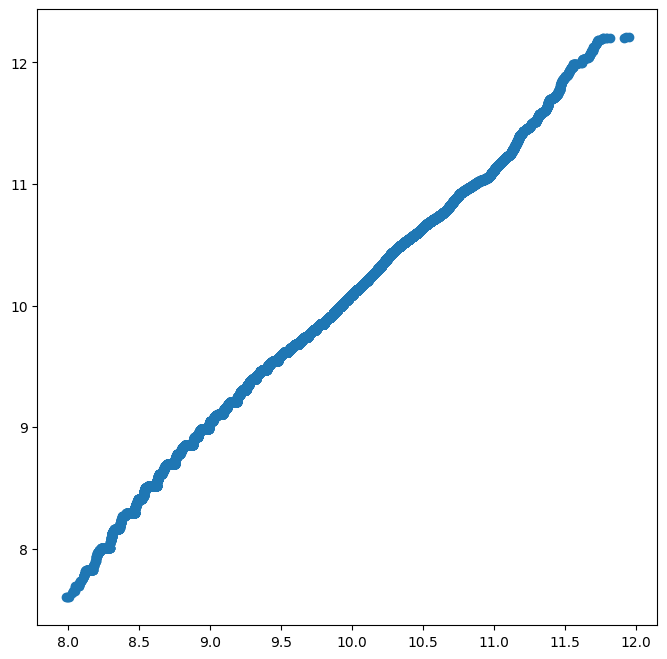

In [144]:
ax = subplots(figsize=(8,8))[1] 
ax.scatter(sorted(Y_test), sorted(y_train[:100000])) 
